In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [94]:
police_killings = pd.read_csv("police_killings.csv",encoding = "ISO-8859-1")


In [95]:
police_killings.head(10)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79,15523,20833.0,53596,0.388704,1.0,1.0,58,0.073651,0.102955
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,...,44.2,25949,58068.0,48552,1.195996,4.0,4.0,17.2,0.131461,0.203801
7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,...,84.1,25043,66543.0,55909,1.190202,4.0,4.0,12.2,0.094347,0.090438
8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,...,66.3,16778,30391.0,38310,0.793292,2.0,1.0,37.7,0.140833,0.047601
9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,...,26.5,22005,44553.0,51667,0.862311,3.0,2.0,18.4,0.174167,0.102692


In [4]:
print(police_killings.columns)

Index([u'name', u'age', u'gender', u'raceethnicity', u'month', u'day', u'year',
       u'streetaddress', u'city', u'state', u'latitude', u'longitude',
       u'state_fp', u'county_fp', u'tract_ce', u'geo_id', u'county_id',
       u'namelsad', u'lawenforcementagency', u'cause', u'armed', u'pop',
       u'share_white', u'share_black', u'share_hispanic', u'p_income',
       u'h_income', u'county_income', u'comp_income', u'county_bucket',
       u'nat_bucket', u'pov', u'urate', u'college'],
      dtype='object')


# Shootings by Race :

In [5]:
race_ethnicity_counts = police_killings["raceethnicity"].value_counts()

In [7]:
print(race_ethnicity_counts)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


([<matplotlib.axis.XTick at 0xa6989e8>,
 <a list of 6 Text xticklabel objects>)

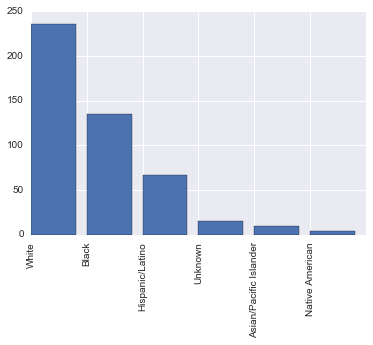

In [12]:
plt.bar(range(6),race_ethnicity_counts)
index = race_ethnicity_counts.index
plt.xticks(range(6),index,rotation = "vertical")

Note : I expected black people to be shot more, but it seems like white people were shot way more than normal. May be they were armed? I should check that. But it's also possible that compared to white population itself white people were shot less and black people were shot more compared to their population in US.

In [14]:
(race_ethnicity_counts/sum(race_ethnicity_counts))*100

White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
Name: raceethnicity, dtype: float64

According to <a href = "https://en.wikipedia.org/wiki/Demography_of_the_United_States#Race_and_ethnicity">Wikipedia demographic information on US racial breakdown </a> total proportion of white american's is around 72.4% in US, whereas black American proportion is around 12.6%, we see in our police killings 28% of black American's get killed by police. So it does seem black population is overrepresented among police killings. Asian American, 4.8% in overall population is definitely underrepresented, not to mention in this dataset Asian/Pacific Islander demographic seems to be considered together.

In [23]:
# Check if police killings p_income has null values or not. Looks like there's no null value but the data type is string.

police_killings["p_income"].dtype
police_killings["p_income"].isnull().sum()
police_killings["p_income"].value_counts().index

Index([u'22969', u'16558', u'15373', u'14256', u'-', u'19921', u'37476',
       u'21130', u'28125', u'16415',
       ...
       u'21509', u'23974', u'27535', u'22080', u'22085', u'21474', u'25755',
       u'40021', u'24858', u'20075'],
      dtype='object', length=452)

# Breakdown by income:

(array([   4.,   21.,   76.,  103.,   94.,   58.,   44.,   29.,   16.,
          10.,    3.,    3.,    2.,    0.,    1.,    0.,    0.,    0.,
           0.,    1.]),
 array([  5457. ,   9485.3,  13513.6,  17541.9,  21570.2,  25598.5,
         29626.8,  33655.1,  37683.4,  41711.7,  45740. ,  49768.3,
         53796.6,  57824.9,  61853.2,  65881.5,  69909.8,  73938.1,
         77966.4,  81994.7,  86023. ]),
 <a list of 20 Patch objects>)

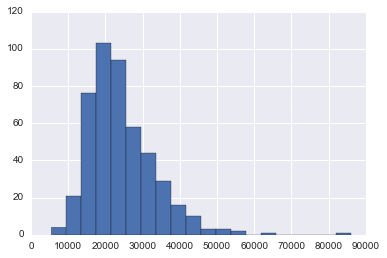

In [27]:
plt.hist(police_killings["p_income"][police_killings["p_income"]!="-"].astype(float),bins = 20)

Looks like most police killings happen in neighborhoods where the median income is lower than 50000-60000. But it's natural rich people won't get gunned by police. 

In [29]:
police_killings["p_income"][police_killings["p_income"]!="-"].astype(float).median()


22348.0

According to personal income statistics in Wikipedia (See : <a href = "https://en.wikipedia.org/wiki/Personal_income_in_the_United_States"> here </a>) median income for male, age 25+ who are employed full time is around 25000+ and for unemployed people it's around 20000+,(for only people who have some college) so I guess its kind of similar in a sense

# Male vs female killings

In [31]:

# Checking the male female breakdown
police_killings["gender"].value_counts()


Male      445
Female     22
Name: gender, dtype: int64

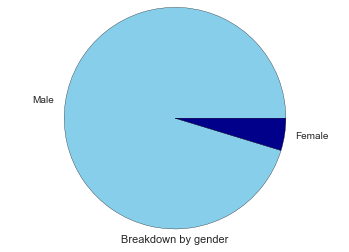

In [48]:
plt.pie(police_killings["gender"].value_counts().values,labels = police_killings["gender"].value_counts().index, colors = ["skyblue","darkblue"])
plt.axis("equal")
plt.xlabel("Breakdown by gender")

# Age wise shootings :

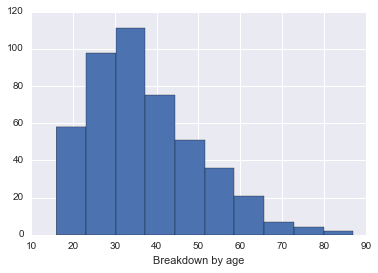

In [40]:
plt.hist(police_killings["age"][police_killings["age"]!= "Unknown"].astype(float))
plt.xlabel("Breakdown by age")

Most people who were killed seemed to be between 15-35, older people have less chance of being shot.

# Killings by state

To get the population adjusted rate of killing per state, we get the population data from US Cencus first. Police killings data set has given the numbers on how many people were killed per state, but states with larger population will have more deaths, so it's important to get the population data at hand too.

In [46]:
state_pop = pd.read_csv("state_population.csv")


In [49]:
counts = police_killings["state_fp"].value_counts()

In [52]:
state_pop.head(5)

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [68]:
# Create a new dataframe called states with one column STATE that holds the index of counts, and another with the shooting values
states = pd.DataFrame({"STATE":counts.index, "shootings":counts})

In [69]:

states.head(5)

,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22


In [70]:
#State_pop(Population data from CENSUS) and states both share the column STATE, so after merging only the values available
# in both datasets remain
states = states.merge(state_pop,on = "STATE")

In [71]:
states.head(5)

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4


In [72]:
states["pop_millions"] = states["POPESTIMATE2015"]/1000000

In [73]:
states["rate"] = states["shootings"]/states["pop_millions"]

In [76]:
# Sort the states from least police killings to most
states.sort_values("rate",ascending = True).head(10)

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


In [78]:
# Sort the states from highest police killings to lowest
states.sort_values("rate",ascending = False).head(10)

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338,5.624674
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065,3.661359
27,31,6,40,2,4,Nebraska,1896190,1425853,75.2,1.896190,3.164240
34,15,4,40,4,9,Hawaii,1431603,1120770,78.3,1.431603,2.794071
39,2,2,40,4,9,Alaska,738432,552166,74.8,0.738432,2.708442
33,16,4,40,4,8,Idaho,1654930,1222093,73.8,1.654930,2.417021
32,35,5,40,4,8,New Mexico,2085109,1588201,76.2,2.085109,2.397956
10,22,11,40,3,7,Louisiana,4670724,3555911,76.1,4.670724,2.355095
7,8,12,40,4,8,Colorado,5456574,4199509,77.0,5.456574,2.199182
41,10,2,40,3,5,Delaware,945934,741548,78.4,0.945934,2.114312


([<matplotlib.axis.XTick at 0xe013438>,
 <a list of 47 Text xticklabel objects>)

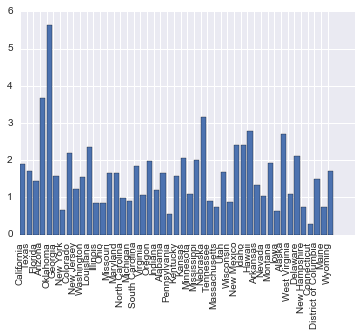

In [109]:
plt.bar(range(states["rate"].shape[0]),states["rate"])
plt.xticks(range(states.shape[0]),states["NAME"], rotation = "vertical")

Looks like poor southern states have higher police killing rates than the rich northern states like NYC or Massachusettes

# high killing rate states vs low killing rate states

In [97]:
police_killings["state"].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
WA    11
NJ    11
IL    11
LA    11
OH    10
MD    10
NC    10
MO    10
VA     9
MI     9
SC     9
OR     8
AL     8
IN     8
KY     7
PA     7
TN     6
NE     6
MN     6
MS     6
KS     6
WI     5
MA     5
UT     5
NM     5
AR     4
ID     4
HI     4
NV     3
IA     2
AK     2
WV     2
MT     2
DE     2
DC     1
ME     1
CT     1
WY     1
NH     1
Name: state, dtype: int64

In [79]:
pk = police_killings[
    (police_killings["share_white"] != "-") & 
    (police_killings["share_black"] != "-") & 
    (police_killings["share_hispanic"] != "-")
]

In [84]:
pk["share_white"].astype(float,inplace = True)
pk["share_black"].astype(float,inplace = True)
pk["share_hispanic"].astype(float,inplace = True)


0       5.6
1       0.5
2      16.8
3      98.8
4       1.7
5      79.0
6      44.2
7      84.1
8      66.3
9      26.5
10     44.9
11     12.9
12     53.3
13      3.1
14      7.5
15     24.7
16      6.4
17     15.7
18     16.5
19     15.2
20     58.1
21      2.9
22     41.4
23     76.4
24      9.7
25     15.1
26      1.9
27     77.9
28      6.5
29     89.9
       ... 
437     4.0
438    18.1
439    19.5
440    38.4
441    55.3
442    20.9
443     5.5
444     8.5
445     0.3
446     1.1
447     8.4
448    15.0
449     4.2
450    10.4
451    10.4
452    10.4
453    40.1
454    60.3
455     4.8
456     0.0
457    18.6
458     6.0
459     2.5
460     7.7
461     4.9
462     0.0
463    20.2
464     0.3
465    37.1
466    12.3
Name: share_hispanic, dtype: float64

In [87]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]



In [89]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [90]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

Seems like low killing states have similar population, but higher county income, similar share of white people and a higher share of black people living there. It is possible where there's low number of black people, they are considered as minority and their death rate increases, but this data is county level whereas we are looking at state level killings so its not conclusive.